# Airlines_Customer_satisfication_prediction 

# Logistic Regression Model

In [45]:
#importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve


In [46]:
#Reading the dataset
d1=pd.read_csv(r"C:\Users\saimo\Desktop\tefoLogic_Training_1\5_Projects\Airlines_Customer_satisfaction_project_2\Invistico_Airline.csv")
d1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [47]:
#finding first 5 rows
d1.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [48]:
#below 5 rows
d1.tail(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [49]:
#Finding unique values 
d1['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [50]:
d1['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [51]:
d1['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [52]:
d1['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [53]:
d1.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [54]:
#Statistical information
d1.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [55]:
#finding rows & columns
d1.shape

(129880, 23)

In [56]:
#finding datatypes
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [57]:
list(d1)

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [58]:
#fINDING NULL VALUES
d1.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [59]:
#grouping single column
n=d1.groupby(["satisfaction"]).count()
n

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,
dissatisfied,58793,58793,58793,58793,58793,58793,58793,58793,58793,58793,...,58793,58793,58793,58793,58793,58793,58793,58793,58793,58605
satisfied,71087,71087,71087,71087,71087,71087,71087,71087,71087,71087,...,71087,71087,71087,71087,71087,71087,71087,71087,71087,70882


# Data visulization

# Piechart ploting

<function matplotlib.pyplot.show(close=None, block=None)>

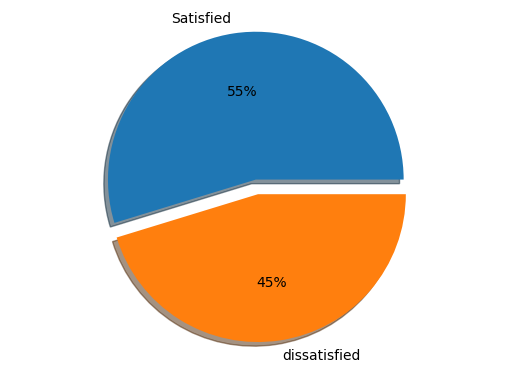

In [60]:
labels= ['Satisfied', 'dissatisfied']
values=d1['satisfaction'].value_counts().values

plt.axis('equal')
plt.pie(values, labels=labels,autopct='%0.00f%%', explode=[0.1,0], shadow=True)
plt.show

# Histogram ploting

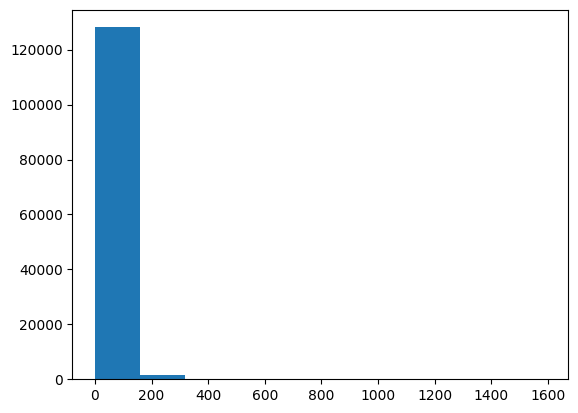

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(d1['Departure Delay in Minutes'])
plt.show()

In [62]:
list(d1)

['satisfaction',
 'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [63]:
#Mapping function
# our target is finding customer satisfication 

# satisfied = 1
# dissatisfied = 0

d1['satisfaction']=d1['satisfaction'].map({'satisfied':1,'dissatisfied':0})
d1

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [64]:
#droping unwanted column
d2=d1.drop(["Gate location"],axis=1)
d2

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [65]:
# Filling null values 
# this column (Arrival Delay in Minutes) contains null values by using mean

d2['Arrival Delay in Minutes'] = d2['Arrival Delay in Minutes'].fillna(d2['Arrival Delay in Minutes'].mean())


In [66]:
# our data consists strings ,so by using get_dummies  it can convert into integers
d3=pd.get_dummies(d2,dtype=int)

In [67]:
d3

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,65,265,0,0,0,2,4,2,3,...,0.0,1,0,1,0,0,1,0,1,0
1,1,47,2464,0,0,0,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,1,15,2138,0,0,0,2,0,2,2,...,0.0,1,0,1,0,0,1,0,1,0
3,1,60,623,0,0,0,3,4,3,1,...,0.0,1,0,1,0,0,1,0,1,0
4,1,70,354,0,0,0,4,3,4,2,...,0.0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,1731,5,5,5,2,5,2,2,...,0.0,1,0,0,1,0,1,0,1,0
129876,0,63,2087,2,3,2,2,1,1,3,...,172.0,0,1,0,1,0,1,1,0,0
129877,0,69,2320,3,0,3,3,2,2,4,...,163.0,0,1,0,1,0,1,0,1,0
129878,0,66,2450,3,2,3,3,2,2,3,...,205.0,0,1,0,1,0,1,0,1,0


In [68]:
#Finding correletion
cor=d3.corr()
cor

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
satisfaction,1.000000,0.117971,-0.039224,0.242384,-0.015507,0.120677,0.227062,0.523496,0.390143,0.431772,...,-0.080567,0.212236,-0.212236,0.292592,-0.292592,0.109239,-0.109239,0.311912,-0.278062,-0.067537
Age,0.117971,1.000000,-0.249625,0.008784,0.039055,0.015749,0.013965,0.130511,0.121201,0.071594,...,-0.011229,-0.008996,0.008996,0.284172,-0.284172,0.044808,-0.044808,0.138731,-0.132597,-0.012922
Flight Distance,-0.039224,-0.249625,1.000000,-0.042409,0.001350,-0.004649,0.012230,-0.027542,-0.032022,-0.022299,...,0.109912,-0.120605,0.120605,-0.018938,0.018938,0.122762,-0.122762,0.164576,-0.138107,-0.052151
Seat comfort,0.242384,0.008784,-0.042409,1.000000,0.434951,0.715997,0.129131,0.426447,0.120278,0.211531,...,-0.025465,0.072109,-0.072109,0.042845,-0.042845,-0.016839,0.016839,-0.033495,0.023528,0.019401
Departure/Arrival time convenient,-0.015507,0.039055,0.001350,0.434951,1.000000,0.527381,-0.001974,0.077203,-0.000546,0.001755,...,0.002595,-0.052190,0.052190,0.186053,-0.186053,-0.191525,0.191525,-0.057531,0.047451,0.019817
Food and drink,0.120677,0.015749,-0.004649,0.715997,0.527381,1.000000,0.025917,0.367669,0.028554,0.041189,...,-0.014857,0.059197,-0.059197,0.048725,-0.048725,0.031751,-0.031751,0.049622,-0.046908,-0.005618
Inflight wifi service,0.227062,0.013965,0.012230,0.129131,-0.001974,0.025917,1.000000,0.253823,0.557340,0.601100,...,-0.035215,0.031396,-0.031396,0.073400,-0.073400,0.019321,-0.019321,0.062784,-0.055314,-0.014853
Inflight entertainment,0.523496,0.130511,-0.027542,0.426447,0.077203,0.367669,0.253823,1.000000,0.441957,0.321731,...,-0.033268,0.140959,-0.140959,0.235757,-0.235757,0.079576,-0.079576,0.248224,-0.218458,-0.059173
Online support,0.390143,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.557340,0.441957,1.000000,0.617489,...,-0.036028,0.090141,-0.090141,0.186154,-0.186154,0.039385,-0.039385,0.184179,-0.159505,-0.048872
Ease of Online booking,0.431772,0.071594,-0.022299,0.211531,0.001755,0.041189,0.601100,0.321731,0.617489,1.000000,...,-0.039746,0.082134,-0.082134,0.149664,-0.149664,0.025790,-0.025790,0.133061,-0.115284,-0.035214


# HEAT MAP

<Axes: >

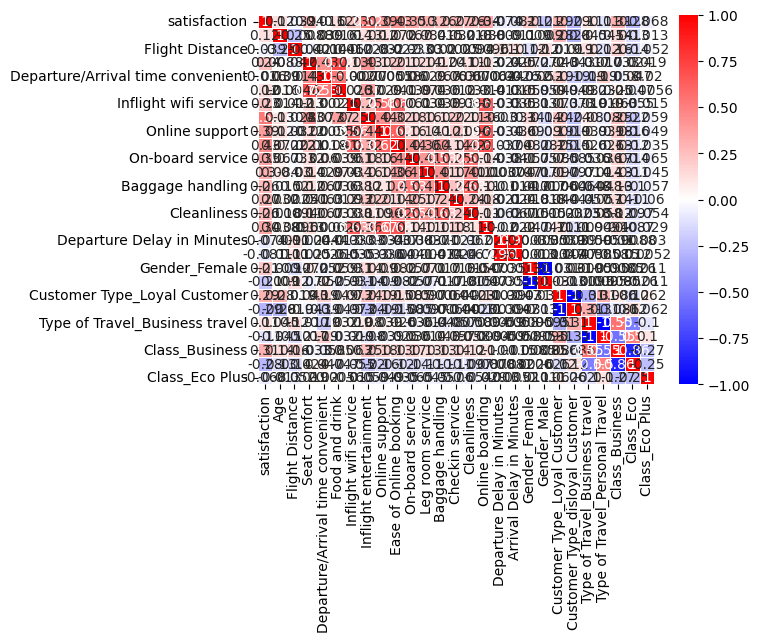

In [69]:
import seaborn as sns
sns.heatmap(cor,vmax=1,vmin=-1,annot=True,linewidths=.55,cmap='bwr')

In [70]:
#which  the parameter is predected values can be removed from the data file 
#1) we copied the data into another data("y")
#2) later we can removed those file from main data set
y=d3['satisfaction']
x=d3.drop('satisfaction',axis=1)

In [71]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int64

In [72]:
x.head(5)


,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,4,2,3,3,...,0.0,1,0,1,0,0,1,0,1,0
1,47,2464,0,0,0,0,2,2,3,4,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,2,0,2,2,3,...,0.0,1,0,1,0,0,1,0,1,0
3,60,623,0,0,0,3,4,3,1,1,...,0.0,1,0,1,0,0,1,0,1,0
4,70,354,0,0,0,4,3,4,2,2,...,0.0,1,0,1,0,0,1,0,1,0


# spliting enter data into ->67% traning  ,  ->33% testing

In [73]:


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=96)

# LOGISTIC REGRESSION MODEL

In [74]:
# logistic we predicted 1 0r 0  only satisfied or not
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [75]:
#prediction
y_pred=classifier.predict(x_test)

In [76]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# CONFUSION MATRIX

In [78]:

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

# [true +ve  false +ve]
#  false -ve  True -ve
#true +ve means correct predicted values  = 1's
#true -ve means correct predicted values  =0's
#false +ve means wrong predicted values  = 1's
#false -ve means wrong predicted values  =0's

array([[10694,  3968],
       [ 2640, 15168]], dtype=int64)

# Accuracy 

In [79]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7964890668309208

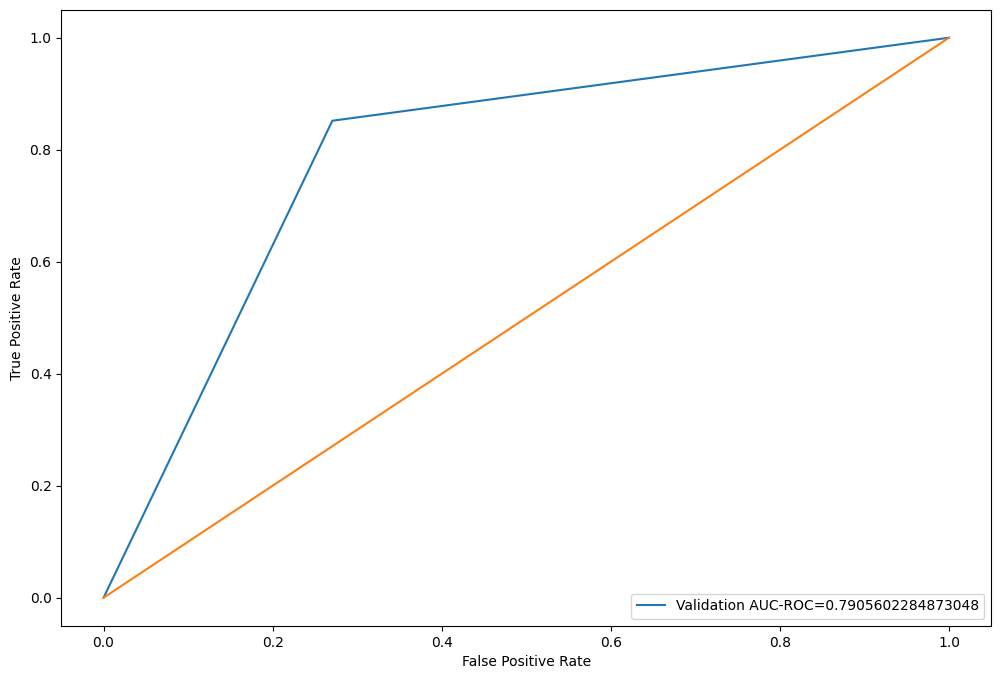

In [80]:
#SAMPLE VALIDATION ROC CURVE
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()